## String Matching -- Aho Corasick

https://en.wikipedia.org/wiki/Aho%E2%80%93Corasick_algorithm

If you are instresrted in the original paper, you can download it from the following url.
Alfred V. Aho and Margaret J. Corasick, ''Efficient string matching: an aid to bibliographic search,'' CACM, vol. 18, pp. 333-340, June 1975.
http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.96.4671


Aho-Corasick algorithm is a multiple string matching algorithm that constructs a finite state machine from a pattern (list of keywords), then uses the machine to locate all occurrences of the keywords in a body of text.

### Multiple patterns matching

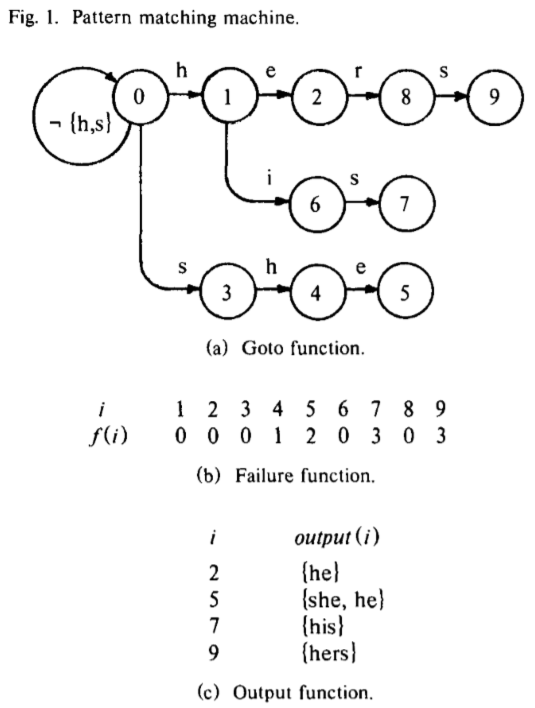

In [1]:
# For a set of keywords {he, she, his, hers},
# the corresponding pattern matching machine is ...

from IPython.display import Image
Image(filename='AC_functions.png', width=400) 

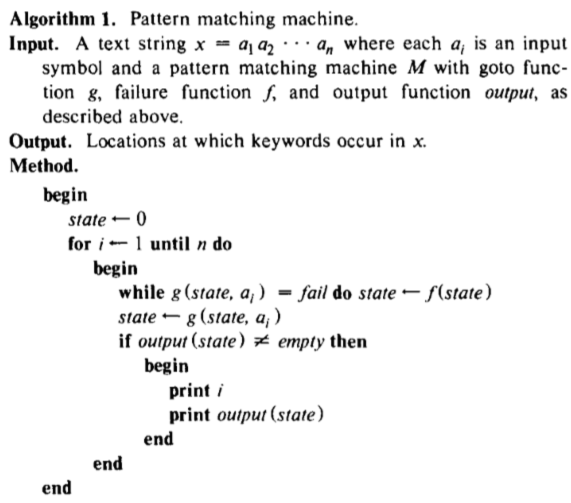

In [2]:
Image(filename='AC_algo1.png', width=500) 

### Goto function

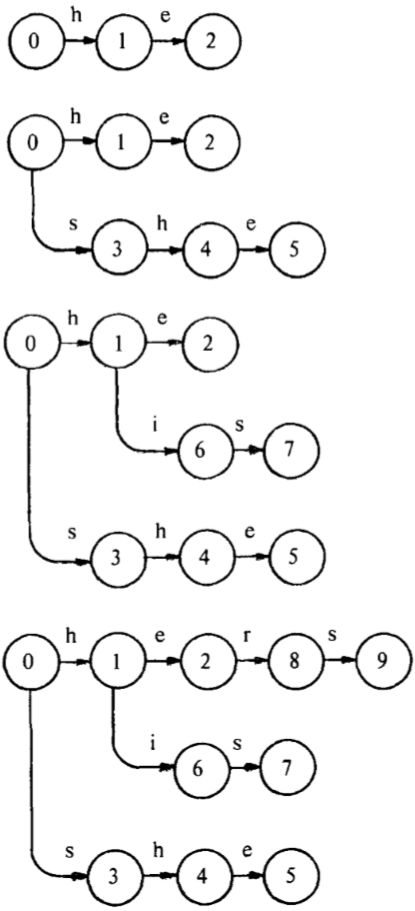

In [3]:
Image(filename='AC_goto.png', width=300)
# {he, she, his, hers}

Up to this point, the graph is a rooted directed tree. To complete the construction of the goto function, we add a loop from state 0 to state 0 on all input symbols other than h or s. Then we obtain the directed graph shown in Fig 1 (a).

### Failure function

The failure function is constructed from the goto function, $g$. Let us define the **depth** of a state $s$ in the goto graph as the length of the shortest path from the start state to s. Thus in Figure 1 (a), the start state is of depth 0, states 1 and 3 are of depth 1, states 2, 4, and 6 are of depth 2, and so on.

We shall compute the failure function for all states of depth 1, then for all states of depth 2, and so on, until the failure function has been computed for all states (except state 0 for which the failure function is not defined). The algorithm to compute the failure function *f* at a state is conceptually quite simple. We make $f(s) = 0$ for all states $s$ of depth 1. Now suppose $f$ has been computed for all states of depth less than $d$. The failure function for the states of depth $d$ is computed from the failure function for the states of depth less than $d$. The states of depth $d$ can be determined from the nonfail values of the goto function of the states of depth $d-1$.

Specifically, to compute the failure function for the states of depth $d$, we consider each state $r$ of depth $d-1$ and perform the following actions. 

1. If $g(r, a)$ = *fail* for all $a$, do nothing. 
2. Otherwise, for each symbol $a$ such that $g(r, a) = s$ ,do the following:

    1. Set $state = f(r)$
    2. Execute the statement $state \leftarrow f(state)$ zero or more times, until a value for *state* is obtained such that $g(state, a) \neq fail$. (Note that since $g(0, a) \neq fail$ for all $a$, such a state will always be found.)
    3. Set $f(s) = g(state, a)$.

In [4]:
'''
Example, 

depth 0:
f(0) not defined

depth 1:
f(1) = f(3) = 0

depth 2:
f(2): s = 2, r = 1, a = 'e'
  2-A. Set state = f(1) = 0
  2-B. g(0, 'e') = 0 (i.e., not fail)
  2-C. Set f(2) = g(0, 'e') = 0

f(6): s = 6, r = 1, a = 'i'
  2-A. Set state = f(1) = 0
  2-B. g(0, 'i') = 0 (i.e., not fail)
  2-C. Set f(6) = g(0, 'i') = 0

f(4): s = 4, r = 3, a = 'h'
  2-A. Set state = f(3) = 0
  2-B. g(0, 'h') = 1 (i.e., not fail)
  2-C. Set f(4) = g(0, 'h') = 1   <----- can skip comparison

depth 3:
f(5): s = 5, r = 4, a = 'e'
  2-A. Set state = f(4) = 1
  2-B. g(1, 'e') = 2 (i.e., not fail)
  2-C. Set f(5) = g(2, 'e') = 2   <----- can skip comparison
  
and so on
'''

"\nExample, \n\ndepth 0:\nf(0) not defined\n\ndepth 1:\nf(1) = f(3) = 0\n\ndepth 2:\nf(2): s = 2, r = 1, a = 'e'\n  2-A. Set state = f(1) = 0\n  2-B. g(0, 'e') = 0 (i.e., not fail)\n  2-C. Set f(2) = g(0, 'e') = 0\n\nf(6): s = 6, r = 1, a = 'i'\n  2-A. Set state = f(1) = 0\n  2-B. g(0, 'i') = 0 (i.e., not fail)\n  2-C. Set f(6) = g(0, 'i') = 0\n\nf(4): s = 4, r = 3, a = 'h'\n  2-A. Set state = f(3) = 0\n  2-B. g(0, 'h') = 1 (i.e., not fail)\n  2-C. Set f(4) = g(0, 'h') = 1   <----- can skip comparison\n\ndepth 3:\nf(5): s = 5, r = 4, a = 'e'\n  2-A. Set state = f(4) = 1\n  2-B. g(1, 'e') = 2 (i.e., not fail)\n  2-C. Set f(5) = g(2, 'e') = 2   <----- can skip comparison\n  \nand so on\n"

### Output function

During the computation of the failure function we also **update** the output function. When we determine $f(s) = s'$, we merge the outputs of state $s$ with the outputs of state $s'$.

For example, from Figure 1 (a) we determine $f(5)$ = 2. At this point we merge the output set of state 2, namely *{he}*, with the output set of state 5 to derive the new output set *{he, she}*. The final nonempty output sets are shown in Figure 1 (c).

### Design of data structure

Goto function

|   | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|---|---|---|---|---|---|---|---|---|---|---|
| h | 1 |   |   | 4 |   |   |   |   |   |   |
| e |   | 2 |   |   | 5 |   |   |   |   |   |
| s | 3 |   |   |   |   |   | 7 |   | 9 |   |
| i |   | 6 |   |   |   |   |   |   |   |   |
| r |   |   | 8 |   |   |   |   |   |   |   |

But g(0, !{h, s}) = 0?

|   | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|---|---|---|---|---|---|---|---|---|---|---|
| h | 1 | f | f | 4 | f | f | f | f | f | f |
| e | 0 | 2 | f | f | 5 | f | f | f | f | f |
| s | 3 | f | f | f | f | f | 7 | f | 9 | f |
| i | 0 | 6 | f | f | f | f | f | f | f | f |
| r | 0 | f | 8 | f | f | f | f | f | f | f |
|oth| 0 | f | f | f | f | f | f | f | f | f |

In [5]:
# Failure function

f = {1:0, 2:0, 3:0, 4:1, 5:2, 6:0, 7:3, 8:0, 9:3}

### Implementation

In [6]:
goto = dict() # dcit of dict
goto[0] = dict()# root

output = dict() # dict of list

newstate = 0 # record the id of new node

def compute_goto(keyword_li):
    for keyword in keyword_li:
        enter(keyword)
    # we do not save g(0, !{h,s} in this goto!


def enter(keyword):
    global goto, newstate, output

    # move the leave
    state = 0
    j = 0
    while keyword[j] in goto[state]:
        sym = keyword[j]
        state = goto[state][sym]
        j += 1

    # add new nodes
    for p in range(j, len(keyword)):
        sym = keyword[p]
        newstate += 1
        goto[newstate] = dict() # a new node
        
        goto[state][sym] = newstate
        state = newstate
        
    # update output
    output[state] = set()
    output[state].add(keyword)

In [7]:
print(goto)
keyword_li = ['he', 'she', 'his', 'hers']
compute_goto(keyword_li)
print(goto)

{0: {}}
{0: {'h': 1, 's': 3}, 1: {'e': 2, 'i': 6}, 2: {'r': 8}, 3: {'h': 4}, 4: {'e': 5}, 5: {}, 6: {'s': 7}, 7: {}, 8: {'s': 9}, 9: {}}


In [8]:
print(output)

{2: {'he'}, 5: {'she'}, 7: {'his'}, 9: {'hers'}}


In [9]:
failure = dict()

def compute_failure():
    global goto, output, failure

    # set level 1 to zero
    queue = list() # use list to implement queue
    for a in goto[0]:
        s = goto[0][a]
        queue.append(s)
        failure[s] = 0
    
    # use queue to process nodes in order
    while queue: # while queue is not empty
        r = queue.pop(0)

        # step 2
        for a in goto[r]: 
            s = goto[r][a]
            queue.append(s)
            
            # step 2-A 
            state = failure[r]
            
            # step 2-B
            while (a not in goto[state] and state != 0):
                state = failure[state]

            # step 2-C
            if state == 0:
                failure[s] = goto[0][a] if a in goto[0] else 0
            else:
                failure[s] = goto[state][a]
                
            # update output if needed
            if failure[s] in output:
                output[s] = output[s].union(output[failure[s]])
        

compute_failure()
print(failure)
print(f == failure)

print(output)

{1: 0, 3: 0, 2: 0, 6: 0, 4: 1, 8: 0, 7: 3, 5: 2, 9: 3}
True
{2: {'he'}, 5: {'she', 'he'}, 7: {'his'}, 9: {'hers'}}
